In [ ]:
import pandas as pd
import numpy as npoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
import seaborn as sns+999999999999996
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
import shap

In [2]:
data = pd.read_csv('social_factors.csv')
data = pd.DataFrame(data)
del data['Unnamed: 0']

In [16]:
data['political_stability_2020'] = [item + 3 for item in data['political_stability_2020']]
data['religion'] = data['religion'].map({'christians':1,'muslims':2,'buddhists':3,'unaffiliated':4,'hindus':5,'jews':6,'folkReligions':7})

In [23]:
data.groupby('Continent')['homosexuality_score'].mean()

Continent
Africa           0.836364
Asia             2.307692
Europe           6.661017
North America    3.434783
Oceania          3.200000
South America    6.416667
Name: homosexuality_score, dtype: float64

In [24]:
fig = px.scatter(data, x="crimeIndex", y="country", color="Continent",
                 size='political_stability_2020', hover_data=['crimeIndex'])
fig.show()


In [25]:
fig = px.scatter(data, x="homosexuality_score", y="country", color="Continent",
                 size='political_stability_2020', hover_data=['homosexuality_score'])
fig.show()


In [50]:
fig = px.scatter(data, x="protein_supply_2017", y="country", color="Continent",
                 size='food_insecurity_2017', hover_data=['protein_supply_2017'])
fig.show()


In [34]:
df = pd.melt(data, id_vars='Continent', value_vars=['fem_life_expectancy', 'male_life_expectancy'])


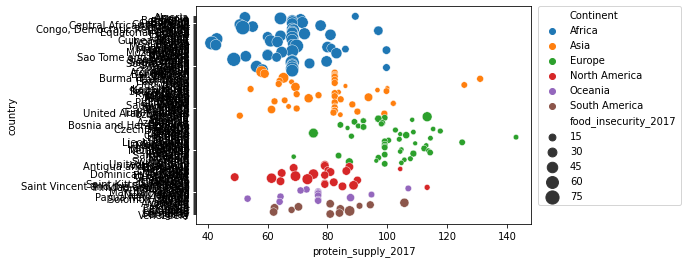

In [46]:
 sns.scatterplot(
    data=data, x="protein_supply_2017", y="country", hue="Continent", size="food_insecurity_2017",
    sizes=(20, 200), legend="auto"
)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='obesity_2016', ylabel='country'>

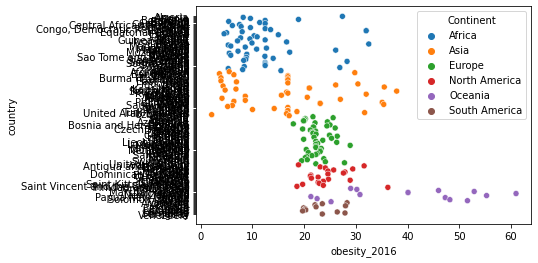

In [42]:
sns.scatterplot(data=data, x="obesity_2016", y="country", hue="Continent")


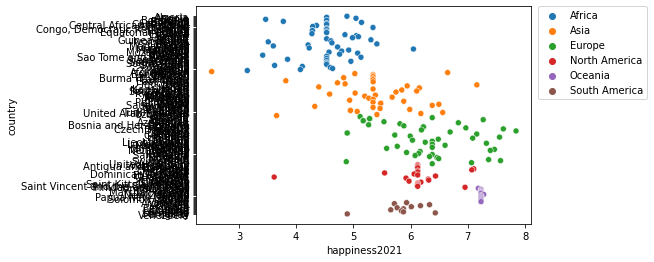

In [45]:
sns.scatterplot(data=data, x="happiness2021", y="country", hue="Continent")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


<AxesSubplot:xlabel='political_stability_2020', ylabel='country'>

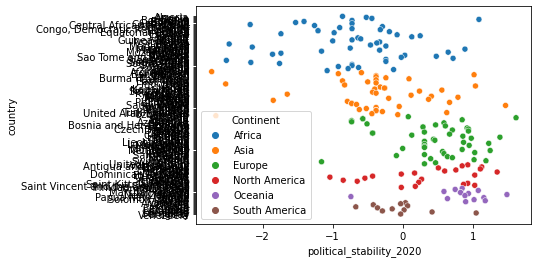

In [41]:
sns.scatterplot(data=data, x="political_stability_2020", y="country", hue="Continent")


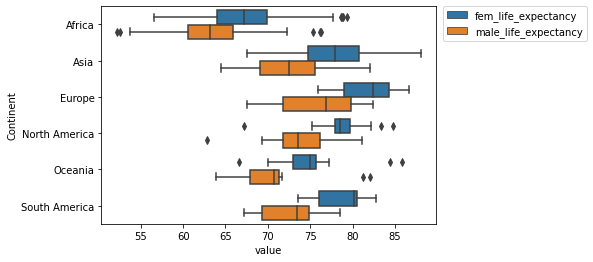

In [38]:
sns.boxplot(data=df, x="value", y="Continent", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

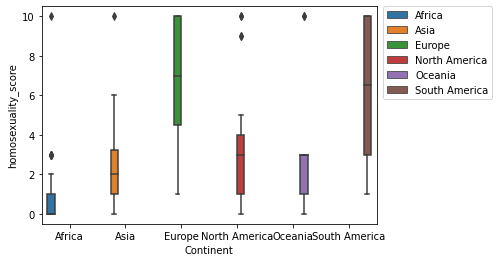

In [24]:
sns.boxplot(data=data, x="Continent", y="homosexuality_score", hue="Continent")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


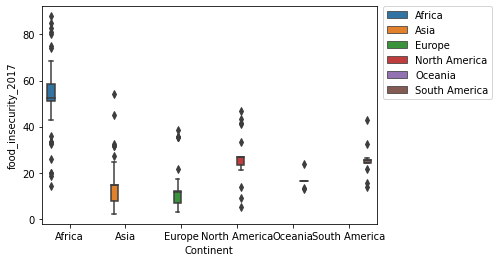

In [25]:
sns.boxplot(data=data, x="Continent", y="food_insecurity_2017", hue="Continent")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
PCA > FIND IMPORTANT VARIABLES -> FINDING THE BEST VARAIBLES TO PREDICT THE CONTINENT > PRODUCE THE BEST CLUSTERS
SCALE AND NORMALISE

In [105]:
from sklearn import preprocessing

info = data.drop(['Continent', 'country'], axis=1)
scaler = preprocessing.MinMaxScaler()
data_transform = scaler.fit_transform(info)
data_transform = pd.DataFrame(data_transform)
data_transform.columns = info.columns

In [117]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_transform,pd.get_dummies(data['Continent']))

RandomForestRegressor()

<BarContainer object of 14 artists>

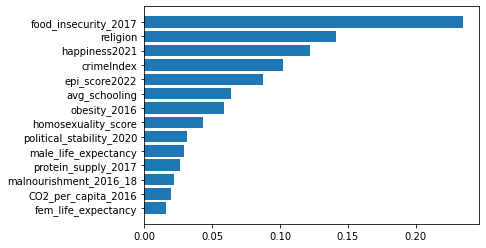

In [121]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(info.columns[sorted_idx], rf.feature_importances_[sorted_idx])


In [131]:
fig = px.scatter(data, x="happiness2021", y="country", color="Continent", hover_data=['happiness2021'])
fig.show()


In [134]:
fig = px.scatter(data, x="crimeIndex", y="country", color="Continent", hover_data=['crimeIndex'])
fig.show()

In [133]:
fig = px.scatter(data, x="epi_score2022", y="country", color="Continent", hover_data=['epi_score2022'])
fig.show()

One thing to note about food_insecurity is the abundance of NA values from the original dataset. The number of overlapping data skews the data towards a distictive characterisation, and therefore dominates in presenting itself within machine learning. This is the case with happiness, religion, and crimeIndex as well. 

To withold the intergrity of the study, these variables are best removed.

In [137]:
from sklearn import preprocessing

info = data.drop(['Continent', 'country','crimeIndex','happiness2021','food_insecurity_2017','religion'], axis=1)
scaler = preprocessing.MinMaxScaler()
data_transform = scaler.fit_transform(info)
data_transform = pd.DataFrame(data_transform)
data_transform.columns = info.columns

<BarContainer object of 10 artists>

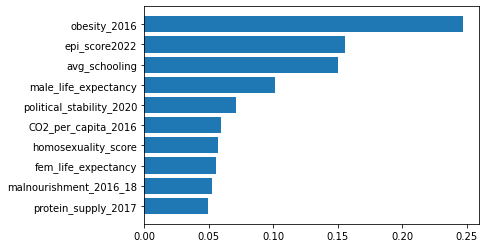

In [138]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_transform,pd.get_dummies(data['Continent']))

sorted_idx = rf.feature_importances_.argsort()
plt.barh(info.columns[sorted_idx], rf.feature_importances_[sorted_idx])

In [139]:
fig = px.scatter(data, x="obesity_2016", y="country", color="Continent", hover_data=['obesity_2016'])
fig.show()

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_transform)

In [160]:
fig = px.scatter(x_pca, x = 0,y=1, color = data['Continent'])
fig.show()

<Figure size 432x288 with 0 Axes>

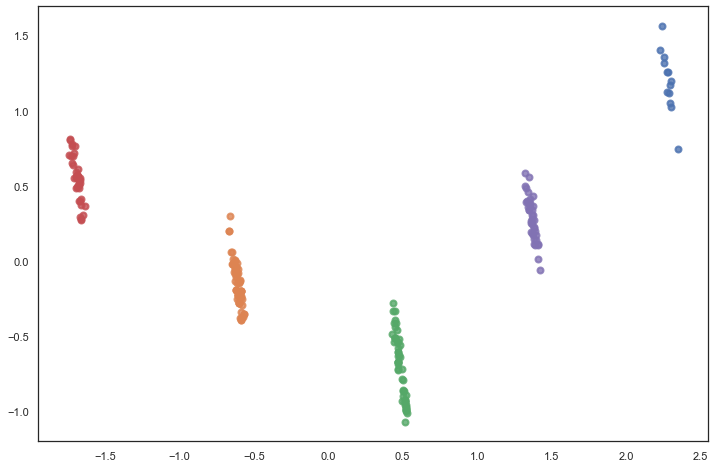

[0.74050806 0.17445965]


In [239]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans = kmeans.fit(data_transform)

predictions = kmeans.predict(data_transform)

pca = PCA(n_components=2)
x_pca = pca.fit(data_transform).transform(data_transform)


plt.figure()
plt.figure(figsize = (12,8))
lw = 2

target_names = ['cluster 0','cluster 1', 'cluster 2','cluster 3','cluster 4']

for i, targetname in zip([0,1,2,3,4],target_names):
    plt.scatter(x_pca[predictions == i,0],x_pca[predictions == i,1], alpha = .8, lw = lw, label = targetname)

plt.show()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print(pca.explained_variance_ratio_)


In [240]:
data_transform['clusters'] = predictions

In [209]:
data_transform.columns

Index(['CO2_per_capita_2016', 'epi_score2022', 'fem_life_expectancy',
       'male_life_expectancy', 'homosexuality_score', 'avg_schooling',
       'malnourishment_2016_18', 'protein_supply_2017',
       'political_stability_2020', 'obesity_2016', 'clusters'],
      dtype='object')

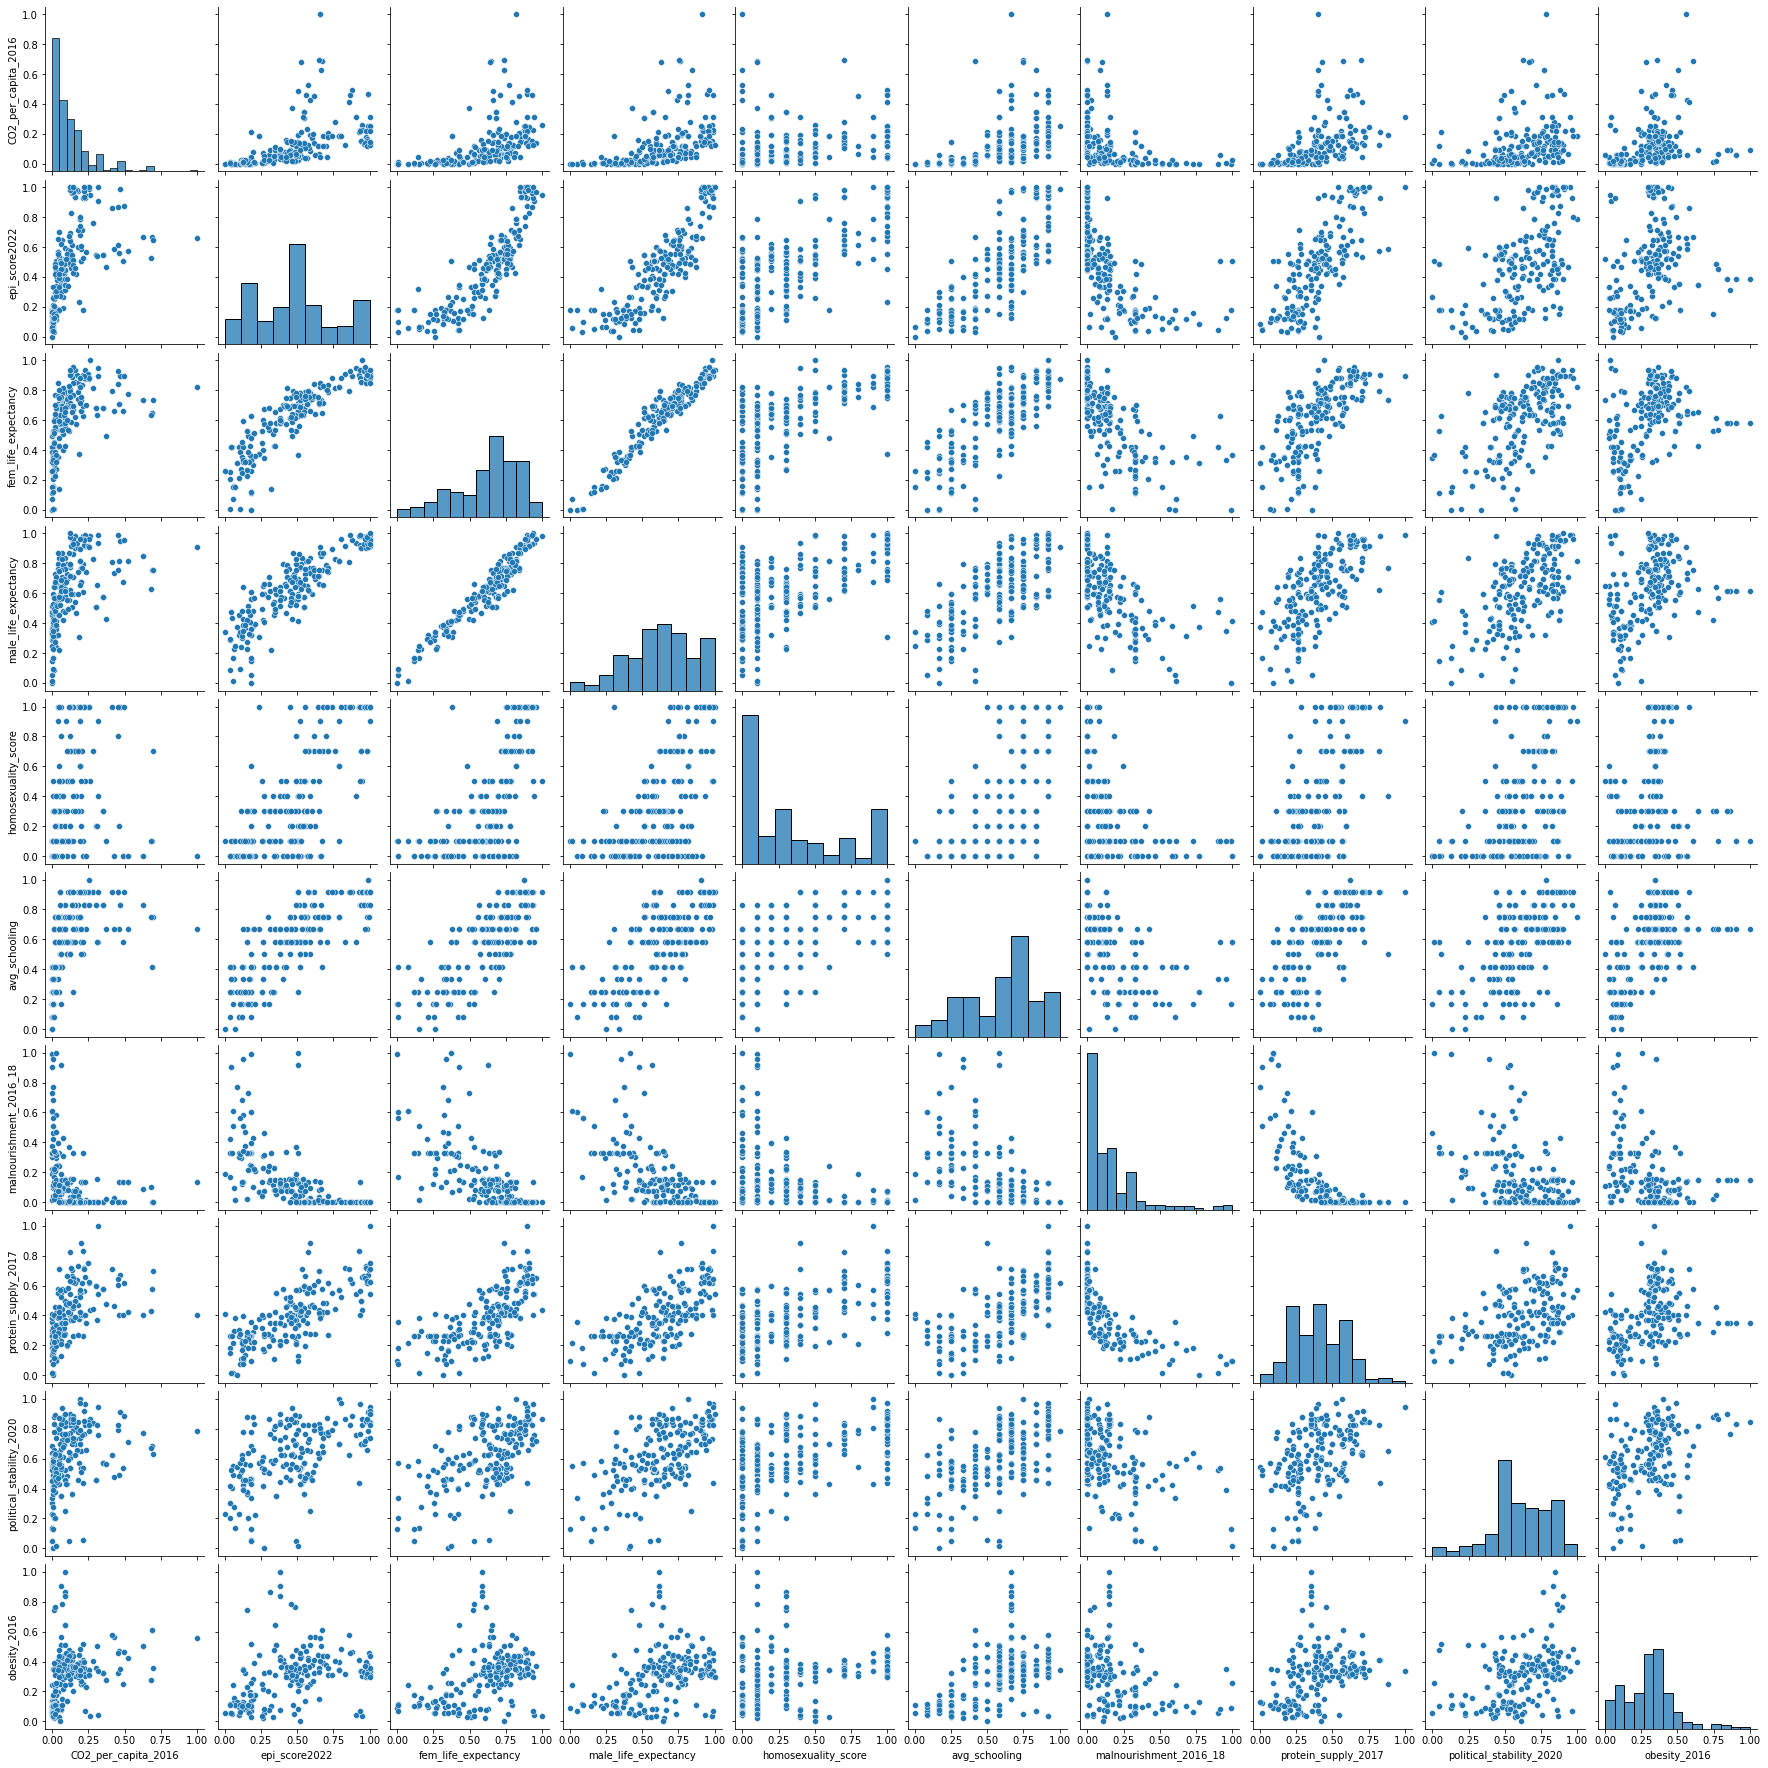

In [211]:
sns.pairplot(data_transform[['CO2_per_capita_2016', 'epi_score2022', 'fem_life_expectancy',
       'male_life_expectancy', 'homosexuality_score', 'avg_schooling',
       'malnourishment_2016_18', 'protein_supply_2017',
       'political_stability_2020', 'obesity_2016']])

<AxesSubplot:xlabel='political_stability_2020', ylabel='obesity_2016'>

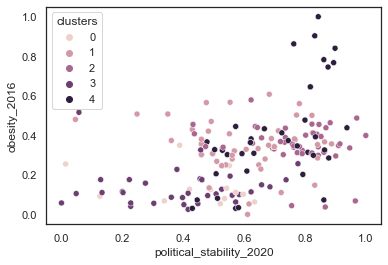

In [241]:
sns.scatterplot(x = 'political_stability_2020', y = 'obesity_2016', hue = 'clusters', data = data_transform)

<AxesSubplot:xlabel='political_stability_2020', ylabel='obesity_2016'>

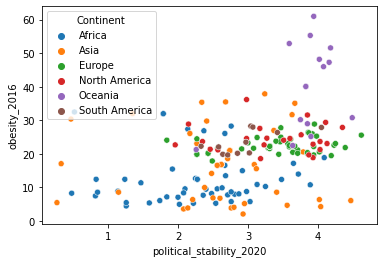

In [214]:
sns.scatterplot(x = 'political_stability_2020', y = 'obesity_2016', hue = 'Continent', data = data)

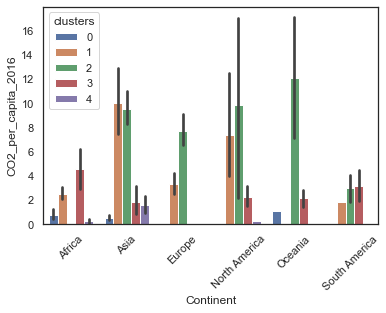

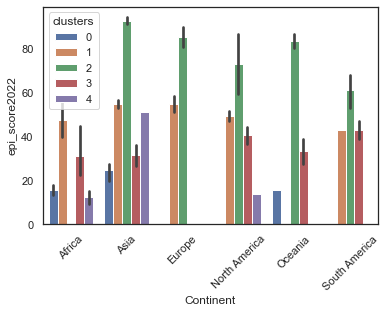

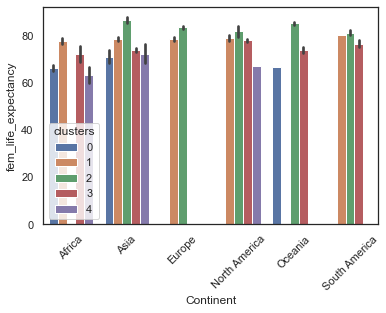

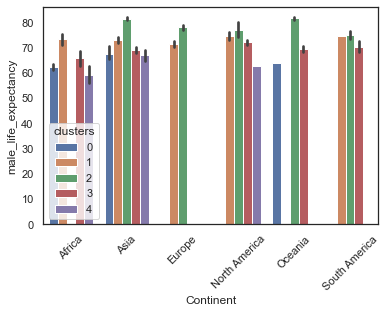

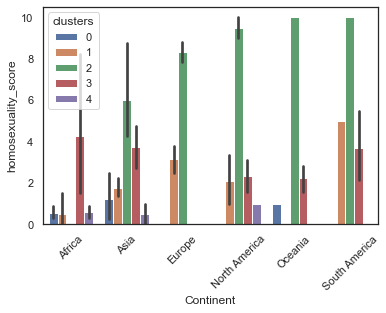

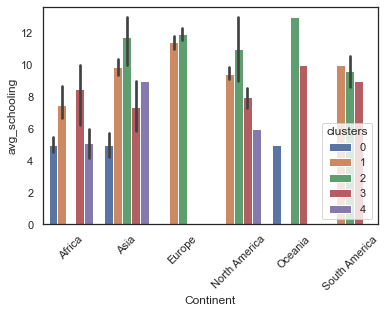

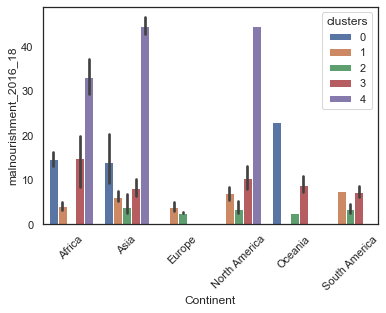

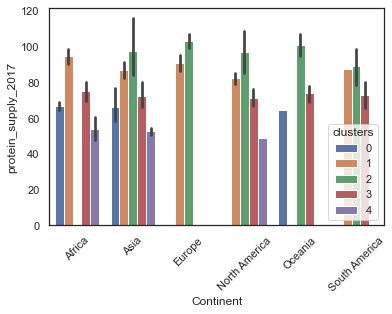

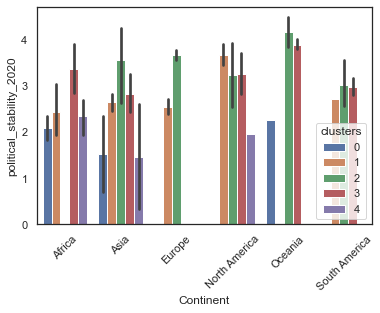

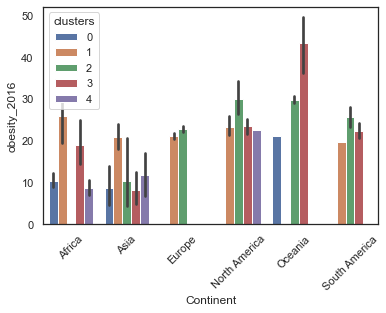

In [249]:
sns.set(style='white')

cols = ['CO2_per_capita_2016', 'epi_score2022', 'fem_life_expectancy',
       'male_life_expectancy', 'homosexuality_score', 'avg_schooling',
       'malnourishment_2016_18', 'protein_supply_2017',
       'political_stability_2020', 'obesity_2016']

for item in cols:
    plt.figure()
    sns.barplot(x='Continent', y=item, hue='clusters', data=data) 
    plt.xticks(rotation=45)
    plt.show